In [48]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Commerce.csv')

In [22]:
df.head(20)

,Age Range,Cost,Brand ID,Category ID,Condition,Country ID,Date,Gender,Quantity,Revenue,Visit ID
0,25-34,187.483353,3,15,Unspecified,1,2010-07-29 00:00:00.000000,Female,2,374.966705,26215
1,19-24,43.984112,46,9,Used,3,2010-08-18 00:00:00.000000,Male,1,43.984112,26216
2,35-44,108.199562,122,19,Unspecified,3,2010-08-16 00:00:00.000000,Male,1,108.199562,26217
3,35-44,154.282379,145,8,Unspecified,2,2010-06-17 00:00:00.000000,Female,1,154.282379,26218
4,55-64,1.994618,4,6,Unspecified,3,2010-06-30 00:00:00.000000,Male,1,1.994618,26219
5,55-64,58.546860,3,6,Unspecified,3,2010-07-09 00:00:00.000000,Male,1,58.546860,26220
6,65+,62.803104,3,9,Unspecified,1,2010-07-19 00:00:00.000000,Male,1,62.803104,26221
7,35-44,224.071060,16,11,Unspecified,3,2010-07-30 00:00:00.000000,Unspecified,1,224.071060,26222
8,0-18,916.831299,3,9,Unspecified,1,2010-08-08 00:00:00.000000,Unspecified,4,3667.325195,26223
9,35-44,43.619289,16,6,Unspecified,2,2010-08-18 00:00:00.000000,Unspecified,1,43.619289,26224


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613002 entries, 0 to 613001
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Age Range    613002 non-null  object 
 1   Cost         613002 non-null  float64
 2   Brand ID     613002 non-null  int64  
 3   Category ID  613002 non-null  int64  
 4   Condition    613002 non-null  object 
 5   Country ID   613002 non-null  int64  
 6   Date         613002 non-null  object 
 7   Gender       613002 non-null  object 
 8   Quantity     613002 non-null  int64  
 9   Revenue      613002 non-null  float64
 10  Visit ID     613002 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 51.4+ MB


In [10]:
re.search('[0-9]+', '34-45').group(0)

'34'

In [14]:
len([type(x) for x in df['Age Range']])

613002

In [29]:
get_number = df['Age Range'].apply(lambda x: re.search('[0-9]+', '+78').group(0))

In [30]:
re.search('[0-9]+', '+78').group(0)

'78'

In [31]:
get_number

0         78
1         78
2         78
3         78
4         78
          ..
612997    78
612998    78
612999    78
613000    78
613001    78
Name: Age Range, Length: 613002, dtype: object

In [32]:
df['Minimum Age'] = df['Age Range'].apply(lambda x: re.search('[0-9]+', '+78').group(0))

In [39]:
df.describe().columns

Index(['Cost', 'Brand ID', 'Category ID', 'Country ID', 'Quantity', 'Revenue',
       'Visit ID'],
      dtype='object')

In [44]:
numerical_df = df[df.describe().columns]

In [52]:
numerical_df.reset_index(inplace=True, drop=False)

In [53]:
correlation_matrix = numerical_df.corr()

In [55]:
correlation_matrix

,index,Cost,Brand ID,Category ID,Country ID,Quantity,Revenue,Visit ID
index,1.000000,-0.005804,0.025530,0.025614,0.009615,-0.128444,-0.004458,0.998739
Cost,-0.005804,1.000000,-0.054009,-0.049836,0.020676,0.181151,0.187678,-0.005450
Brand ID,0.025530,-0.054009,1.000000,0.155453,0.003289,-0.010799,-0.001783,0.025440
Category ID,0.025614,-0.049836,0.155453,1.000000,-0.001465,0.001702,0.000942,0.025516
Country ID,0.009615,0.020676,0.003289,-0.001465,1.000000,-0.004127,-0.000781,0.009531
Quantity,-0.128444,0.181151,-0.010799,0.001702,-0.004127,1.000000,0.563816,-0.126496
Revenue,-0.004458,0.187678,-0.001783,0.000942,-0.000781,0.563816,1.000000,-0.004370
Visit ID,0.998739,-0.005450,0.025440,0.025516,0.009531,-0.126496,-0.004370,1.000000


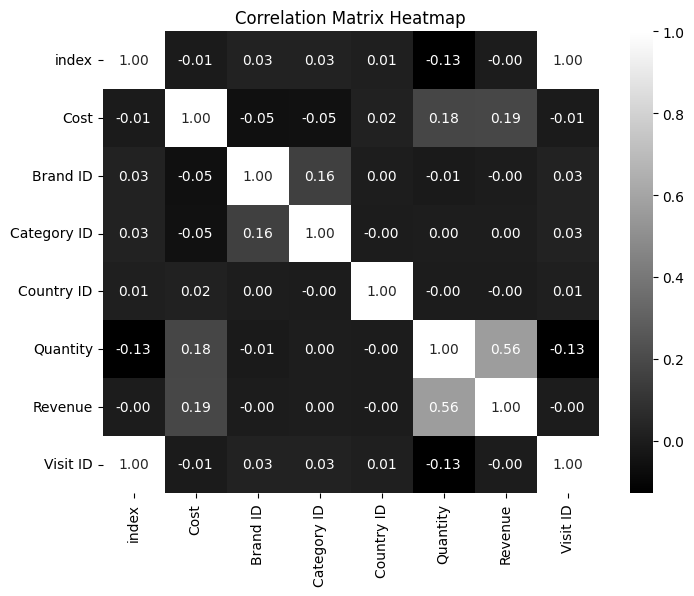

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='gray', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()